In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
1,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
3,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
4,2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792


<AxesSubplot:>

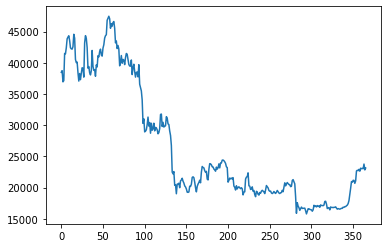

In [3]:
df["Close"].plot()

In [26]:
y = np.asanyarray(df["Close"])
X = np.arange(366)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

print(poly_reg_model.intercept_, poly_reg_model.coef_)

37892.77371162187 [ 2.84782006e+02 -3.66212440e+00 -1.31255687e-02  2.50073195e-04
 -9.03125327e-07  1.02484557e-09]


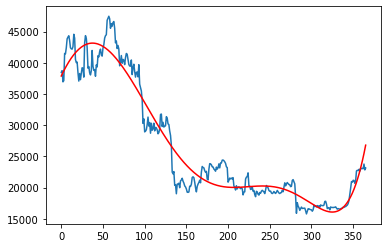

In [31]:
y_predicted = poly_reg_model.predict(poly_features)

plt.plot(X, y)

plt.plot(X, y_predicted, color='red')

In [43]:
std = np.std(y_predicted)
std

9277.73619096354

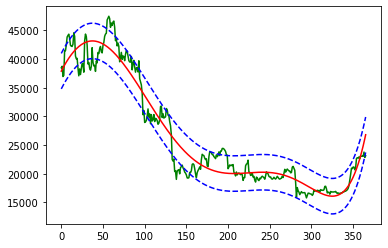

In [93]:
plt.plot(X, y, color="green")

up_set = y_predicted + std / 3
down_set = y_predicted - std / 3

plt.plot(X, y_predicted, color='red')
plt.plot(X, up_set ,"b--",label="up")
plt.plot(X, down_set,"b--",label="down")

In [109]:
up_mask = y > up_set
print(y[up_mask])

[43840.285156 44118.445313 44338.796875 43565.113281 44575.203125
 46820.492188 47128.003906 47465.730469 47062.664063 45538.675781
 46281.644531 45868.949219 46453.566406 46622.675781 45555.992188
 41374.378906 40458.308594 39773.828125 39698.371094 31370.671875
 31155.478516 23809.486328 23947.642578 23957.529297 24402.818359
 24424.068359 24319.333984 24136.972656 23883.291016 23335.998047
 23212.738281]


In [110]:
down_mask = y < down_set
print(y[down_mask])

[38431.378906 37075.28125  38286.027344 37296.570313 38332.609375
 39214.21875  39105.148438 37709.785156 39137.605469 39400.585938
 38419.984375 38062.039063 38737.269531 39437.460938 38794.972656
 38904.011719 37849.664063 39666.753906 39338.785156 30296.953125
 28936.355469 29047.751953 29283.103516 28720.271484 22487.388672
 22206.792969 22572.839844 20381.650391 20471.482422 19017.642578
 20553.271484 20599.537109 20710.597656 19987.029297 21085.876953
 21231.65625  21027.294922 20735.478516 20280.634766 20104.023438
 19784.726563 19269.367188 19242.255859 19297.076172 22840.138672
 23136.001953]


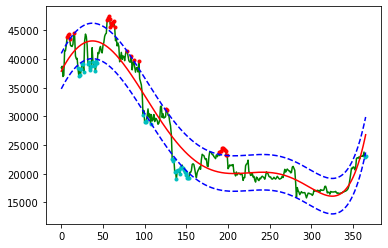

In [122]:
plt.plot(X, y, color="green")
plt.plot(X[up_mask],y[up_mask],'r.')
plt.plot(X[down_mask],y[down_mask],'c.')
plt.plot(X, y_predicted, color='red')
plt.plot(X, up_set ,"b--",label="up")
plt.plot(X, down_set,"b--",label="down")